# Creación de un modelo inicial

In [17]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
path = os.path.join(os.getcwd(),"statlog+german+credit+data/german.data")

column_names = ['estado_cuenta', 'duracion_meses', 'historial_credito', 'proposito', 'monto_credito', 'cuenta_ahorro_bonos', 'empleo_actual', 'tasa_cuota_ingreso',
 'estado_civil_sexo', 'otros_deudores_garantes', 'residencia_actual_anios',
 'propiedad', 'edad', 'otros_planes_cuotas', 'vivienda', 'num_creditos_banco',
 'ocupacion', 'num_personas_a_cargo', 'telefono', 'trabajador_extranjero',
 'buen_mal_credito'
]

df = pd.read_csv(path, header=None, delim_whitespace=True,names=column_names)
df['buen_mal_credito'] = df['buen_mal_credito'].map({1: 1, 2: 0})

estado_civil_sexo_map = {
    "A91": "Hombre - Not Single",
    "A92": "Mujer - Not Single",
    "A93": "Hombre - Single",
    "A94": "Hombre - Not Single",
    "A95": "Mujer - Single"
}

df["estado_civil_sexo"] = df["estado_civil_sexo"].map(estado_civil_sexo_map)
df['sexo'] = df['estado_civil_sexo'].str.split(' - ').str[0]
df['estado_civil'] = df['estado_civil_sexo'].str.split(' - ').str[1]
df.drop(columns=['estado_civil_sexo'], inplace=True)


C:\Users\CTI24644\AppData\Local\Temp\ipykernel_28164\3621759813.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, header=None, delim_whitespace=True,names=column_names)


En primer lugar, vamos a modificar el dataset usando ONE-HOT encoding, para que el clasificador pueda procesarlo.
Por un momento consideramos, para evitar que sean tantas columnas, convertir / interpretar algunas variables como ordinales, pero decidimos no hacerlo. Si bien dentro del modelo muchas categorias son consecuentes, y muestran dentro de la descripcion los limites de cada categoria, los arboles de decision (tipo de clasificador que elegimos), tiende a interpetar estas categorias como mejor que la otra, y queriamos evitar un sesgo de etiqueta que nosotros podiamos introducir en este caso. Aca, no se implicaria que una categoria es mejor que la otra.

In [19]:
## hacemos el encoding 
X = df.drop('buen_mal_credito', axis=1)
X_encoded = pd.get_dummies(X, drop_first=True) 
y = df['buen_mal_credito']


## Eleccion del modelo de clasificación

Como modelo de clasificacion elegimos el Random Forest, ya que consideramos que es el metodo mas efectivo para clasificar este tipo de informacion. Este modelo captura relaciones no lineales, y nos parecio que este modelo iba a ser muy complejo como para restringirlo a un modelo que tenga dificultades con esta complejidad. 
Por otro lado, maneja de mejor manera un las variables categoricas tratadas con este formato y es menos sensible a sobrejustar.

Para que pueda usarse le Random Forest, tenemos que tratar las columnas categoricas, usamos ONE-HOT encoder ya que no son ordinales, por lo que queremo evitar que el clasificador las tome como tal.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

## Entrenamiento y evaluación del modelo

In [21]:
clf = RandomForestClassifier(random_state = 13)
dt = clf.fit(X_train, y_train)

importances = clf.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances.head(20))
print(len(feature_importances))


                     Feature  Importance
1              monto_credito    0.123811
0             duracion_meses    0.089936
4                       edad    0.088595
9          estado_cuenta_A14    0.070118
2         tasa_cuota_ingreso    0.038153
3    residencia_actual_anios    0.035335
37  otros_planes_cuotas_A143    0.023743
13     historial_credito_A34    0.023126
17             proposito_A43    0.022156
43             telefono_A192    0.020680
5         num_creditos_banco    0.020252
26   cuenta_ahorro_bonos_A65    0.019736
41            ocupacion_A173    0.018224
7          estado_cuenta_A12    0.018180
28         empleo_actual_A73    0.018140
45                sexo_Mujer    0.017973
38             vivienda_A152    0.017673
46       estado_civil_Single    0.017650
34            propiedad_A123    0.017592
16             proposito_A42    0.017425
47


----- Matriz de Confusión -----

                | Pred. Positiva  | Pred. Negativa  |
 Real Positiva  |       23        |       37        |
 Real Negativa  |       17        |       123       |

----- Métricas de Evaluación -----

Precisión: 0.76875
Recall: 0.8785714285714286
Accuracy: 0.73
F1-score: 0.82

----- Informe de Clasificación -----

              precision    recall  f1-score   support

           0       0.57      0.38      0.46        60
           1       0.77      0.88      0.82       140

    accuracy                           0.73       200
   macro avg       0.67      0.63      0.64       200
weighted avg       0.71      0.73      0.71       200



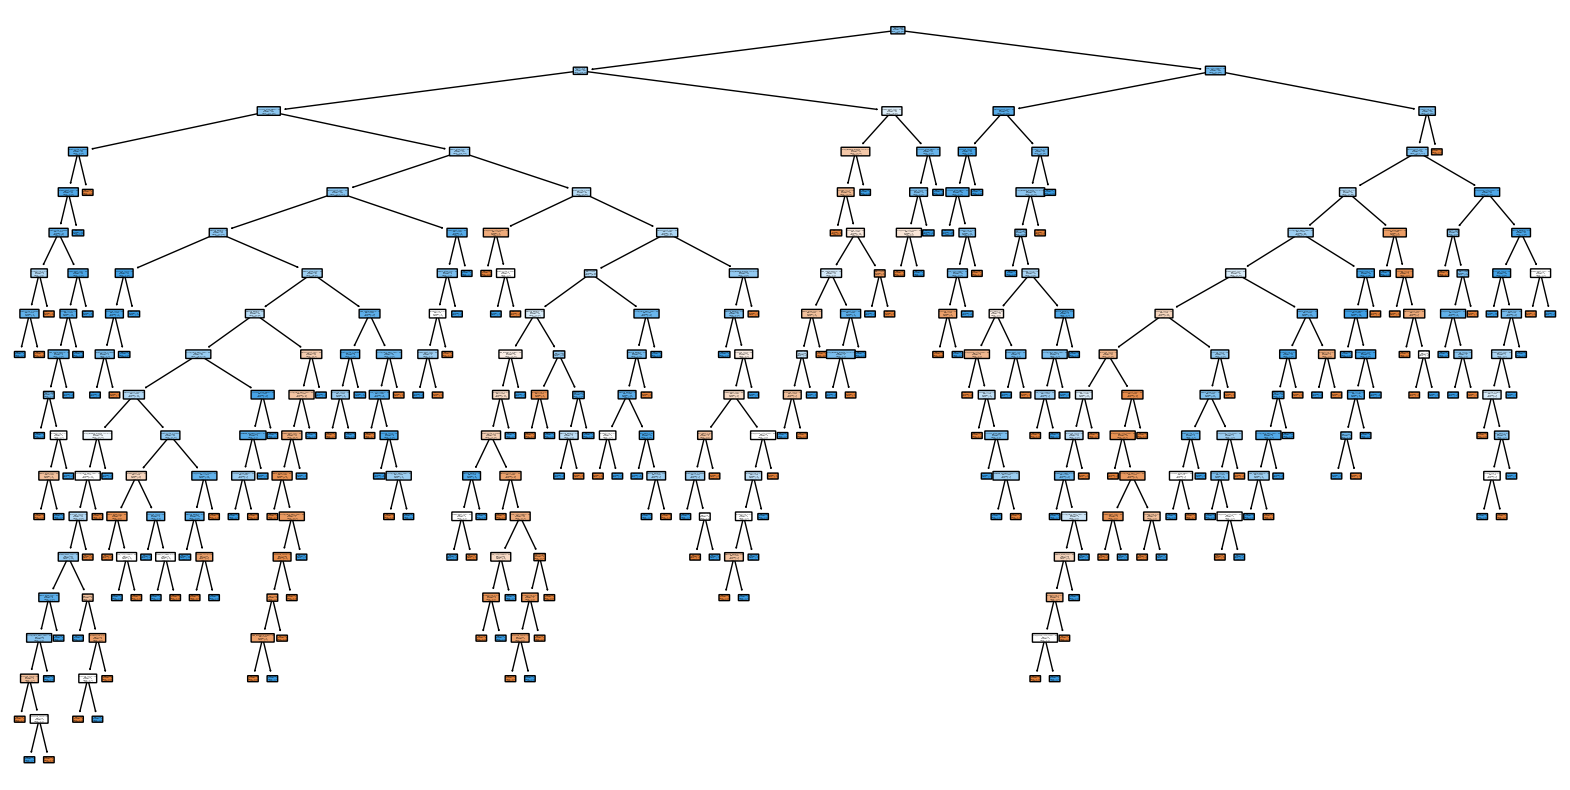

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.tree import plot_tree

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("----- Matriz de Confusión -----", end='\n\n')
print(f'                | {"Pred. Positiva":^15} | {"Pred. Negativa":^15} |')
print(f'{"Real Positiva":^15} | {cm[0, 0]:^15} | {cm[0, 1]:^15} |')
print(f'{"Real Negativa":^15} | {cm[1, 0]:^15} | {cm[1, 1]:^15} |')

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n----- Métricas de Evaluación -----", end='\n\n')
print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

report = classification_report(y_test, y_pred)

print("\n----- Informe de Clasificación -----", end='\n\n')
print(report)

estimator = clf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=X_encoded.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

## Interpretacion de resultados

En primer lugar, si bien podemos observar que las metricas generales son bastante buenas, el modelo no es muy util para predecir la clase positiva. 

En este escenario, un Falso Negativo seria una persona que iba a pagar y que el modelo clasifica como mal pagador, y un Falso Positivo es una persona que no es un acreedor, pero que el modelo dice tener un buen credito. Si bien un falso negativo genera perdidas economicas potenciales para el banco, ya que rechaza una oportunidad de negocio por una prediccion negativa, un falso positivo genera perdidas economicas reales, ya que prestan dinero que no va a volver. Un falso positivo es una perdida activa, y por ende mas grave para la organizacion.

Pero, por otro lado, el True Positive Rate es mas bajo de lo deseado, por ende, no se estan pudiendo identificar los clientes que si van a pagar, que aunque no sea el enfoque primario, la idea no es negar el prestamo a quienes si pagaran porque no hay negocio.

# AHORA EVALUAMOS LA EQUIDAD DEL MODELO

In [31]:
indices_fem = X_encoded[X_encoded['sexo_Mujer'] == True].index

X_fem = X_encoded.loc[indices_fem]
y_fem = y.loc[indices_fem]

y_pred = clf.predict(X_fem)

cm = confusion_matrix(y_fem, y_pred)
print("----- Matriz de Confusión -----", end='\n\n')
print(f'                | {"Pred. Positiva":^15} | {"Pred. Negativa":^15} |')
print(f'{"Real Positiva":^15} | {cm[0, 0]:^15} | {cm[0, 1]:^15} |')
print(f'{"Real Negativa":^15} | {cm[1, 0]:^15} | {cm[1, 1]:^15} |')

precision = precision_score(y_fem, y_pred)
recall = recall_score(y_fem, y_pred)
accuracy = accuracy_score(y_fem, y_pred)
f1 = f1_score(y_fem, y_pred)

print("\n----- Métricas de Evaluación -----", end='\n\n')
print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

report = classification_report(y_fem, y_pred)

print("\n----- Informe de Clasificación -----", end='\n\n')
print(report)




----- Matriz de Confusión -----

                | Pred. Positiva  | Pred. Negativa  |
 Real Positiva  |       99        |       10        |
 Real Negativa  |        5        |       196       |

----- Métricas de Evaluación -----

Precisión: 0.9514563106796117
Recall: 0.9751243781094527
Accuracy: 0.9516129032258065
F1-score: 0.9631449631449631

----- Informe de Clasificación -----

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       109
           1       0.95      0.98      0.96       201

    accuracy                           0.95       310
   macro avg       0.95      0.94      0.95       310
weighted avg       0.95      0.95      0.95       310



In [34]:
print(X_encoded.index.equals(y.index)) 

False


In [35]:
y_aligned = y.reset_index(drop=True)

indices_masc = X_encoded[X_encoded['sexo_Mujer'] == False].index

X_masc = X_encoded.loc[indices_masc]
y_masc = y_aligned.loc[indices_masc]

y_pred = clf.predict(X_masc)

cm = confusion_matrix(y_masc, y_pred)
print("----- Matriz de Confusión -----", end='\n\n')
print(f'                | {"Pred. Positiva":^15} | {"Pred. Negativa":^15} |')
print(f'{"Real Positiva":^15} | {cm[0, 0]:^15} | {cm[0, 1]:^15} |')
print(f'{"Real Negativa":^15} | {cm[1, 0]:^15} | {cm[1, 1]:^15} |')

precision = precision_score(y_masc, y_pred)
recall = recall_score(y_masc, y_pred)
accuracy = accuracy_score(y_masc, y_pred)
f1 = f1_score(y_masc, y_pred)

print("\n----- Métricas de Evaluación -----", end='\n\n')
print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

report = classification_report(y_masc, y_pred)

print("\n----- Informe de Clasificación -----", end='\n\n')
print(report)


KeyError: '[310, 311, 313, 314, 315, 316, 318, 320, 321, 322, 323, 325, 326, 328, 329, 330, 334, 335, 338, 339, 342, 343, 344, 346, 348, 349, 352, 353, 354, 355, 356, 357, 358, 360, 361, 363, 364, 365, 366, 368, 370, 371, 373, 376, 377, 378, 380, 383, 384, 387, 388, 390, 392, 394, 395, 397, 398, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 411, 412, 413, 415, 416, 421, 422, 423, 425, 426, 427, 428, 430, 431, 432, 433, 434, 435, 436, 438, 440, 442, 443, 447, 449, 450, 452, 453, 454, 456, 457, 459, 460, 461, 463, 464, 465, 467, 469, 470, 472, 473, 474, 476, 477, 478, 479, 481, 484, 485, 486, 488, 489, 490, 493, 494, 495, 496, 497, 498, 499, 501, 502, 503, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 516, 518, 519, 520, 522, 525, 527, 528, 529, 530, 532, 533, 534, 535, 538, 540, 541, 542, 543, 544, 545, 547, 549, 551, 552, 553, 555, 558, 559, 560, 561, 563, 564, 566, 567, 568, 571, 574, 578, 579, 580, 581, 583, 586, 587, 588, 589, 594, 597, 598, 599, 605, 606, 608, 609, 615, 616, 617, 619, 620, 621, 622, 624, 625, 626, 627, 628, 629, 631, 632, 635, 637, 639, 641, 642, 643, 644, 645, 646, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 659, 660, 661, 662, 663, 665, 666, 668, 669, 670, 671, 672, 673, 674, 676, 677, 678, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 692, 693, 694, 695, 696, 698, 699, 701, 703, 706, 709, 710, 712, 713, 714, 715, 716, 717, 718, 719, 720, 726, 729, 730, 731, 737, 738, 740, 741, 742, 743, 744, 745, 748, 749, 754, 756, 757, 758, 759, 762, 763, 764, 765, 766, 768, 769, 772, 773, 774, 776, 778, 780, 781, 782, 784, 785, 786, 787, 788, 789, 791, 792, 793, 794, 796, 798, 799, 800, 803, 805, 806, 807, 808, 810, 811, 812, 813, 814, 816, 818, 819, 820, 821, 822, 823, 824, 825, 827, 828, 829, 830, 832, 835, 838, 839, 840, 841, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 857, 859, 860, 861, 863, 864, 867, 868, 871, 872, 874, 876, 877, 878, 879, 880, 881, 882, 884, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 899, 900, 901, 902, 903, 904, 905, 906, 907, 913, 914, 916, 917, 918, 919, 921, 923, 924, 925, 927, 928, 929, 930, 932, 933, 935, 937, 938, 939, 940, 941, 942, 943, 946, 947, 948, 949, 950, 951, 956, 957, 958, 959, 960, 961, 962, 963, 964, 966, 968, 969, 970, 971, 973, 977, 978, 979, 980, 981, 983, 984, 986, 988, 989, 990, 991, 992, 993, 994, 996, 997, 998, 999] not in index'